# __BANKRUPTCY PREVENTION__

> ## -Binary Classification Task

# TOPICS: <a id="home"></a>
- [Exploratary Data Analysis](#eda)<br>
- [Model Building](#model)<br>

# CONTENTS <a id="eda"></a>
[1.Importing Libraries and Reading File](#1)<br>
[2.Checking for Missing values](#2)<br>
[3.Checking for Correlation](#3)<br>
[4.pandas.Crosstab](#6)<br>
[5.Distribution Plot](#4)<br>
[6.Violin and Strip Plot](#12)<br>
[7.Count Plot](#5)<br>
[8.Histogram plots](#7)<br>
[9.Density Estimate Plots](#8)<br>
[10.Grouped Bar Charts using sns.catplot](#9)<br>
[11.Stacked Bar Charts](#10)<br>
[12.Conclution](#11)


> ### Importing Libraries and Reading the file  <a id="1"></a>

In [1]:
# EDA libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr,kendalltau
# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
# Model Libraries
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbours
from sklearn.svm import SVC # Support Vector Machines
from sklearn.tree import DecisionTreeClassifier,plot_tree # Decision Tree
from xgboost import XGBClassifier # XG Boost
import lightgbm as lgb # Light Gradient Boost
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
# Neural Network libraries
from tensorflow import keras
from keras.models import Sequential
from keras.activations import relu, sigmoid
from tensorflow.keras import layers
# Hyperparameter Tuning libraries
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import GridSearchCV 
# Validation libraries
from sklearn.model_selection import KFold,RepeatedKFold,StratifiedKFold 
from sklearn.feature_selection import SelectKBest
# Metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score as ac
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #To see the complete dataset

In [4]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


> ### Checking For Null Values:  <a id="2"></a>

In [5]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
data.shape

(250, 7)

In [8]:
data.describe(include="all")

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [9]:
for x in data.columns:
    y=data[x].unique()
    print("Unique values of %s"%y)

Unique values of [0.5 0.  1. ]
Unique values of [1.  0.  0.5]
Unique values of [0.  0.5 1. ]
Unique values of [0.  0.5 1. ]
Unique values of [0.  0.5 1. ]
Unique values of [0.5 1.  0. ]
Unique values of ['bankruptcy' 'non-bankruptcy']


#### 3 Discrete values is found for the independent variables and 2 discrete classes for the dependent variable

In [10]:
data1=data

> ### Renaming column to avoid errors

In [11]:
data1=data1.rename(columns = {data.columns[6]: 'class_value'})
data1=data1.rename(columns = {data.columns[5]: 'operating_risk'})
data1=data1.rename(columns = {data.columns[4]: 'competitiveness'})
data1=data1.rename(columns = {data.columns[3]: 'credibility'})
data1=data1.rename(columns = {data.columns[2]: 'financial_flexibility'})
data1=data1.rename(columns = {data.columns[1]: 'management_risk'})

In [12]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [13]:
#data2=data1
#data2.head()

In [14]:
label_encoder = preprocessing.LabelEncoder()
data1["class_value"] = label_encoder.fit_transform(data1["class_value"])

In [15]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


> ### Checking for Correlation: <a id="3"></a>

In [16]:
corr=data1.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_value,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


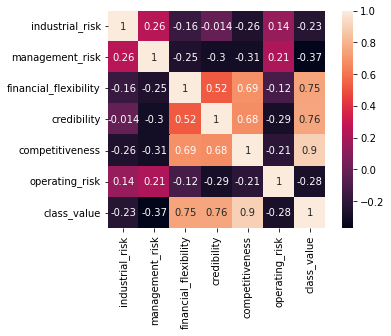

In [17]:
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

### The Correlation values between most variables are not high and so its confusing to find the importance of variables in predicting classes.
***

In [18]:
features=data1.columns[0:6]
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

> ## Calculating Non Parametric Rank Correlation to understand correlation b/w data on Discrete values of features.

## Spearmans Correlation

In [19]:
for feature in features:
    coef, p = spearmanr(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.22947170756968077
Correlation of management_risk -0.37439127379904413
Correlation of financial_flexibility 0.7829528097863406
Correlation of credibility 0.7618550599211005
Correlation of competitiveness 0.9059986995626482
Correlation of operating_risk -0.278442572969297


## Kendall's Correlation

In [20]:
for feature in features:
    coef, p = kendalltau(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.2163785912452097
Correlation of management_risk -0.35468549438782987
Correlation of financial_flexibility 0.7422101139825333
Correlation of credibility 0.7186345687862299
Correlation of competitiveness 0.8577141969809939
Correlation of operating_risk -0.2637672137089971


### Kendall’s Rank Correlation is highly precise for Discrete Data than Spearman's Correlation.(Rank Based- Low, Medium, High)[click for reference link](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
***

> ## Using Crosstab: <a id="6"></a>
### We now use Crosstab from pandas to understand each feature with respect to Bankruptcy.

In [21]:
data1.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_value'],
      dtype='object')

In [22]:
pd.crosstab(data1.industrial_risk, data1.class_value)

class_value,0,1
industrial_risk,,
0.0,26,54
0.5,28,53
1.0,53,36


In [23]:
pd.crosstab(data1.industrial_risk, data1.class_value, normalize='index')

class_value,0,1
industrial_risk,,
0.0,0.325000,0.675000
0.5,0.345679,0.654321
1.0,0.595506,0.404494


In [24]:
pd.crosstab(data1.management_risk, data1.class_value, normalize='index')

class_value,0,1
management_risk,,
0.0,0.177419,0.822581
0.5,0.333333,0.666667
1.0,0.613445,0.386555


In [25]:
pd.crosstab(data1.financial_flexibility, data1.class_value)

class_value,0,1
financial_flexibility,,
0.0,102,17
0.5,4,70
1.0,1,56


In [26]:
pd.crosstab(data1.financial_flexibility, data1.class_value, normalize='index')

class_value,0,1
financial_flexibility,,
0.0,0.857143,0.142857
0.5,0.054054,0.945946
1.0,0.017544,0.982456


In [27]:
pd.crosstab(data1.credibility, data1.class_value, normalize='index')

class_value,0,1
credibility,,
0.0,0.925532,0.074468
0.5,0.220779,0.779221
1.0,0.037975,0.962025


In [28]:
pd.crosstab(data1.competitiveness, data1.class_value, normalize='index')

class_value,0,1
competitiveness,,
0.0,1.000000,0.000000
0.5,0.071429,0.928571
1.0,0.000000,1.000000


In [29]:
pd.crosstab(data1.operating_risk, data1.class_value, normalize='index')

class_value,0,1
operating_risk,,
0.0,0.240506,0.759494
0.5,0.421053,0.578947
1.0,0.561404,0.438596


In [30]:
pd.crosstab(data1.financial_flexibility, data1.competitiveness, normalize='index')

competitiveness,0.0,0.5,1.0
financial_flexibility,,,
0.0,0.823529,0.067227,0.109244
0.5,0.054054,0.432432,0.513514
1.0,0.017544,0.280702,0.701754


### From the pandas.crosstab, we can see the relation between each features with the classes. <br>And it is understood that all features contribute in determining the Bankruptcy. <br>Also we notice that Financial flexibility, Credibility and Competitiveness does the most contribution to the Bankruptcy.
***

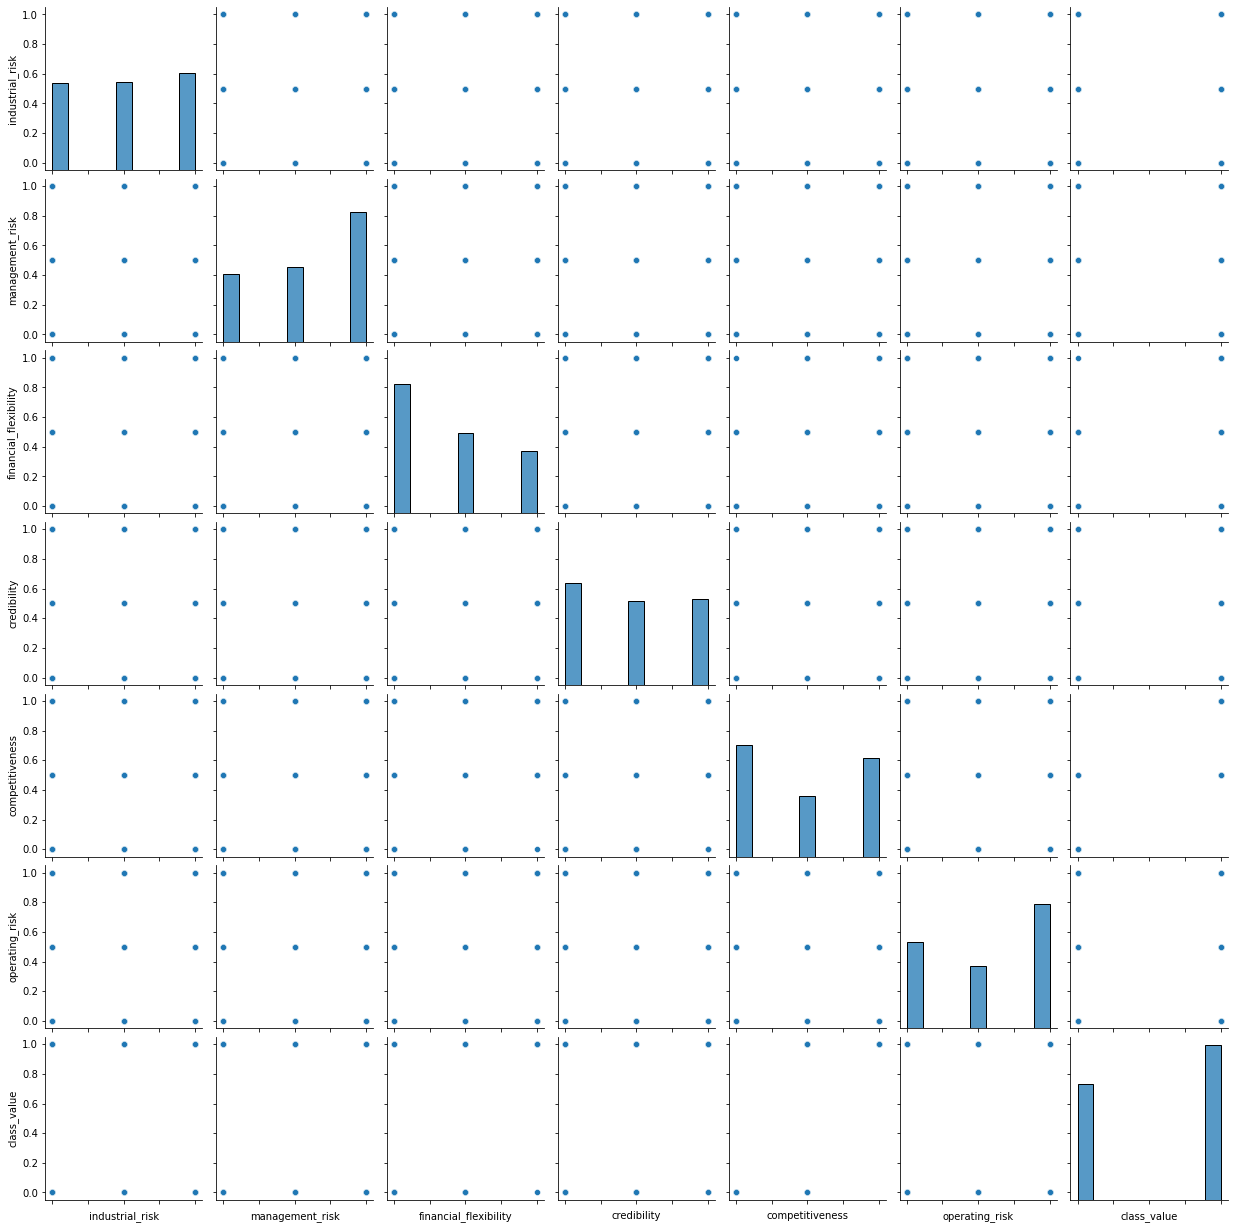

In [31]:
p=sns.pairplot(data1)
p.set(xticklabels=[])
plt.show()

### Pairplot for this data has proven to be not useful because the data is not continuous. Lets explore a bit more on sns.
***

> ## Distribution Plot <a id="4"></a>

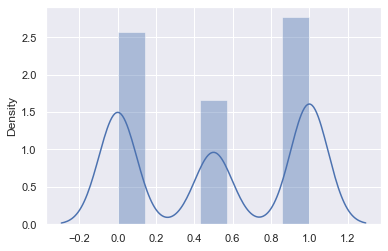

In [32]:
sns.set_theme();
ax = sns.distplot(data1)

### Distribution of the dataset is understood through this plot. This follows Normal Distribution with 3 peaks. <br> This type of distribution is called Multimodal distribution(3 different modes).
***

> ## Basic Understanding with Count Plot <a id="5"></a>

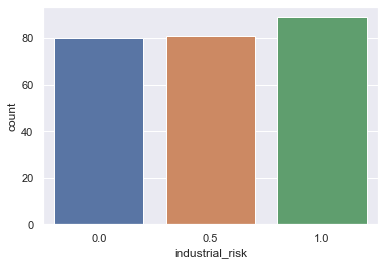

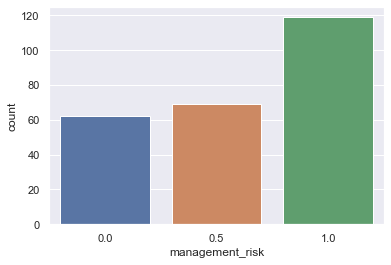

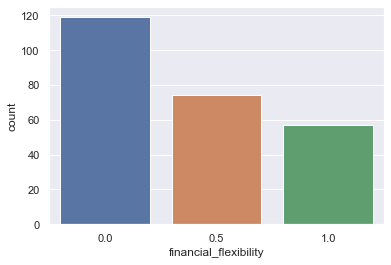

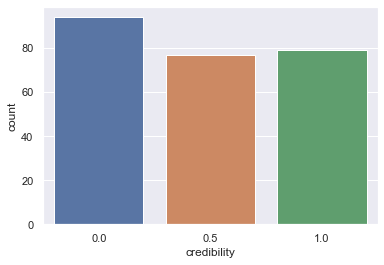

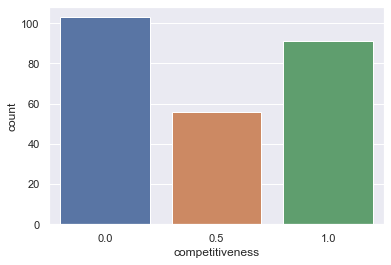

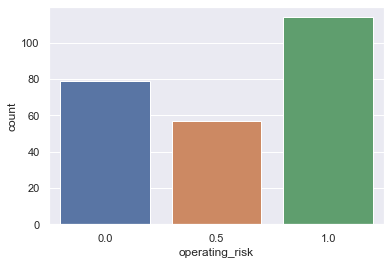

In [33]:
for feature in features:
    sns.countplot(x=feature,data=data1)
    plt.show()

### The above graph are plotted for the features against Bankruptcy which says the count of feature for all the 3 discrete values(i.e. 0,0.5 and 1).
***

> ## Violin and Strip Plot <a id="12"></a>

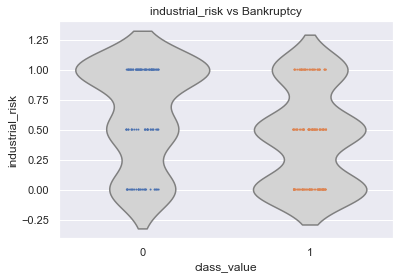

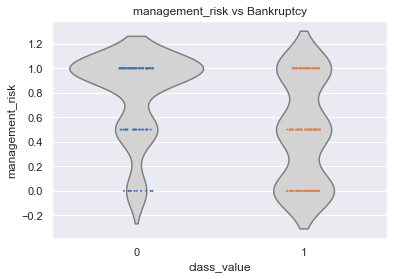

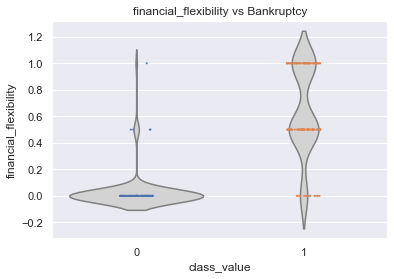

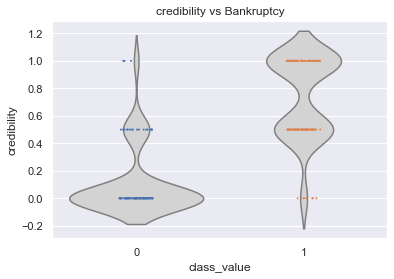

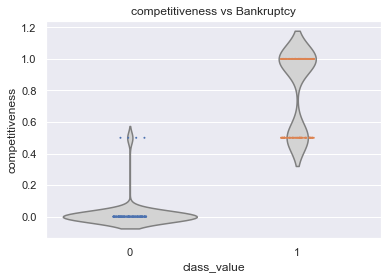

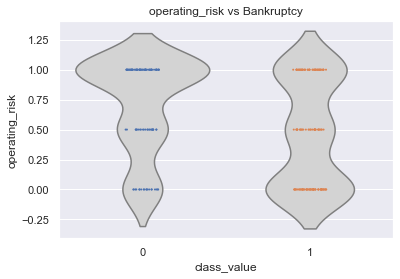

In [34]:
for feature in features:
    sns.violinplot(x='class_value', y=feature, data=data1, inner=None,color='lightgray')
    sns.stripplot(x='class_value', y=feature, data=data1, size=2,jitter=True)
    plt.ylabel(feature)
    plt.title("%s vs Bankruptcy"%feature)
    plt.show()

### From the above violine plots & stripplots we can see that the density of the plot is increased where lot of data are stacked togethor for each classes of Bankruptcy(0&1). <br>Also Stripplot gives the count of the data accumulated for each class. Its helps in better visualization of the violin plot. <br>From this We can understand three features(Financial Flexibility , Credibility and Competitiveness) are highly correlated with dependent variable.
***

> ## Histogram plots <a id="7"></a>

In [35]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


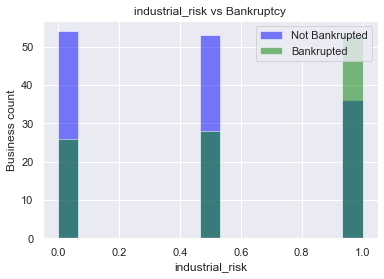

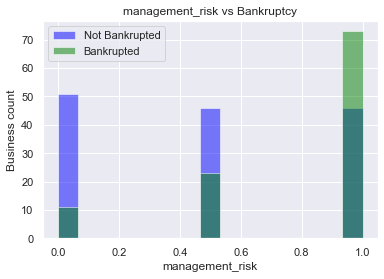

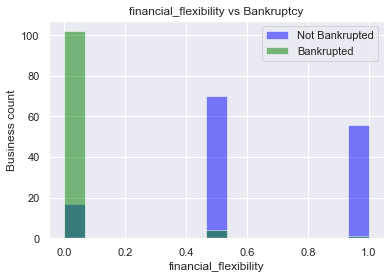

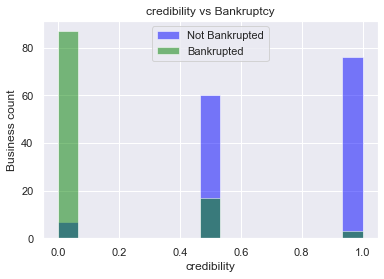

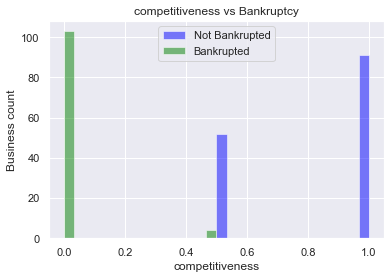

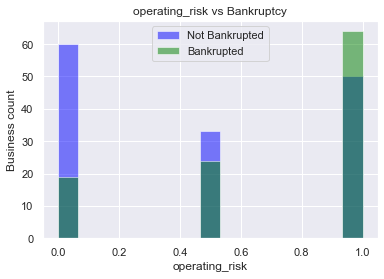

In [36]:
for feature in features:
    fig, ax = plt.subplots()

    ax.hist(data1[data1["class_value"]==1][feature], bins=15, alpha=0.5, color="blue", label="Not Bankrupted")
    ax.hist(data1[data1["class_value"]==0][feature], bins=15, alpha=0.5, color="green", label="Bankrupted")

    ax.set_xlabel(feature)
    ax.set_ylabel("Business count")
    ax.set_title("%s vs Bankruptcy"%feature)

    ax.legend();

### The above bar graphs tells us the relation between each feature and the count of business with bankruptcy
***

> ## Density Estimate Plots <a id="8"></a>

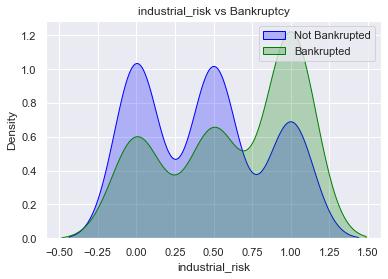

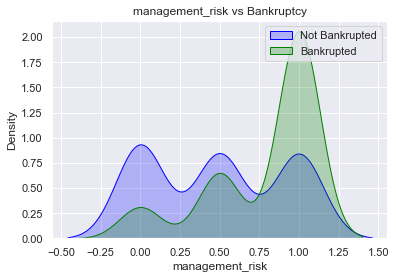

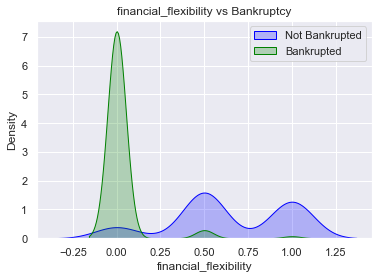

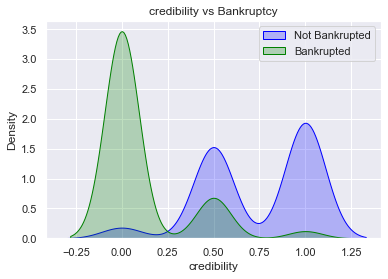

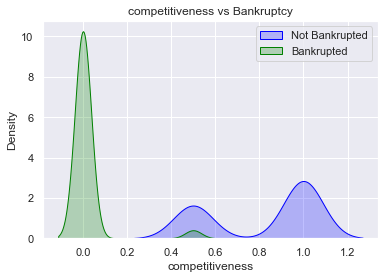

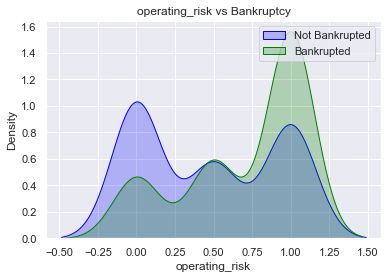

In [37]:
for feature in features:
    fig, ax = plt.subplots()

    sns.kdeplot(data1[data1["class_value"]==1][feature], shade=True, color="blue", label="Not Bankrupted", ax=ax)
    sns.kdeplot(data1[data1["class_value"]==0][feature], shade=True, color="green", label="Bankrupted", ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_title("%s vs Bankruptcy"%feature)
    #fig.suptitle("Financial Flexibility vs. Bankruptcy");
    ax.legend();

### The above graphs show the density of Bankruptcy happening w.r.t different features. We can understand the spread of data with this graph i.e. Normal distribution with 3 peaks(Multimodal distribution).<br>Also we can know from the peaks of a Density Plot where values are concentrated over the interval. <br>We can also understand the distribution shape from the above plots.
***

> ## Grouped Bar Charts using sns.catplot - Type 1 <a id="9"></a>

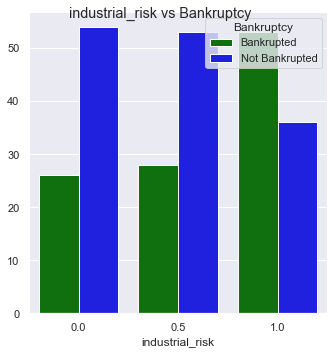

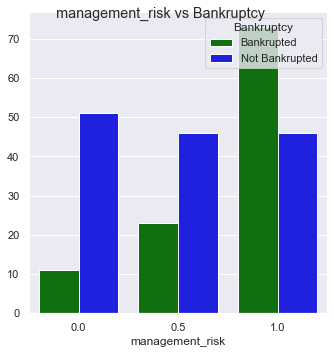

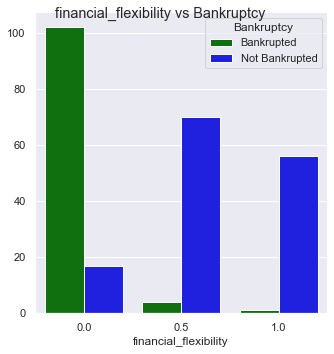

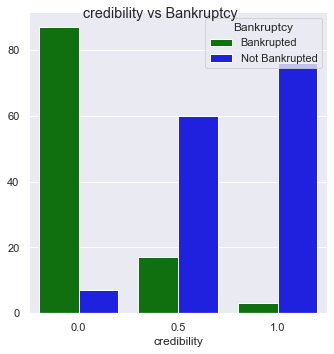

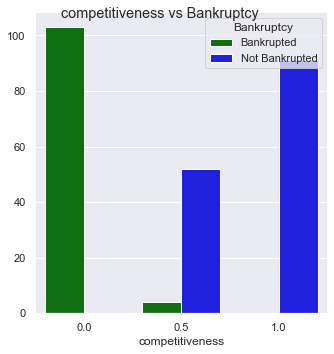

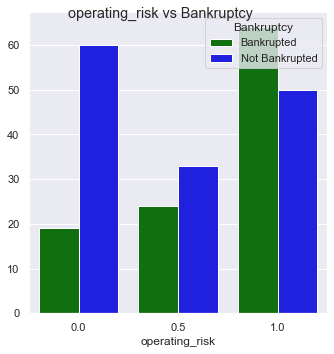

In [38]:
for feature in features:
    g=sns.catplot(feature, hue="class_value", data=data1, kind="count",legend = False,
            palette={1:"blue", 0:"green"})

    g.set_axis_labels(feature,"")
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    #g.set_title("%s vs Bankruptcy"%feature)
    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on bankruptcy along the features. <br>Here we can look at both classes w.r.t features side by side and understand data better.
***

> ## Grouped Bar Charts using sns.catplot - Type 2

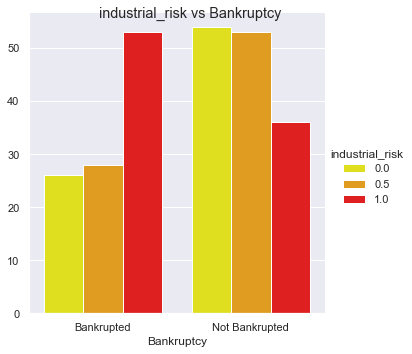

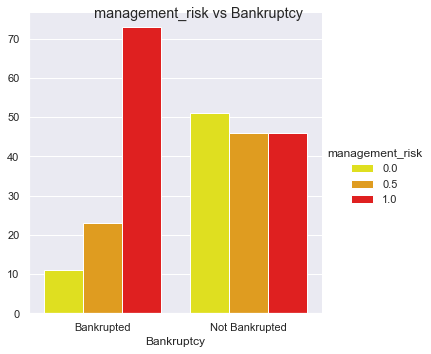

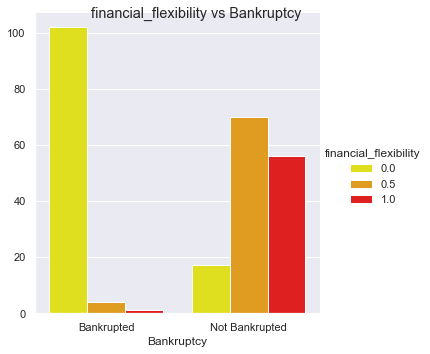

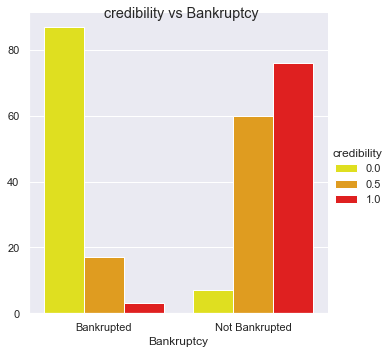

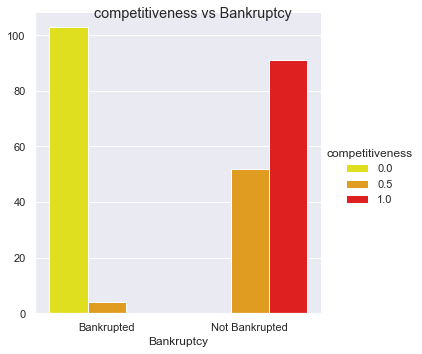

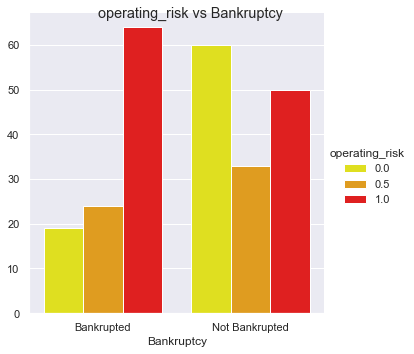

In [39]:
for feature in features:
    g=sns.catplot("class_value", hue=feature, data=data1, kind="count", 
            palette={0:"yellow", 0.5:"orange", 1:"red"})

    g.legend.set_title(feature)
    g.set_xticklabels(["Bankrupted", "Not Bankrupted"])
    g.set_axis_labels("Bankruptcy","")

    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on features along with Bankruptcy.<br>Here we can look at different feature values w.r.t Bankruptcy side by side and understand data better
***

> ## Stacked Bar Charts for checking proportion <a id="10"></a>

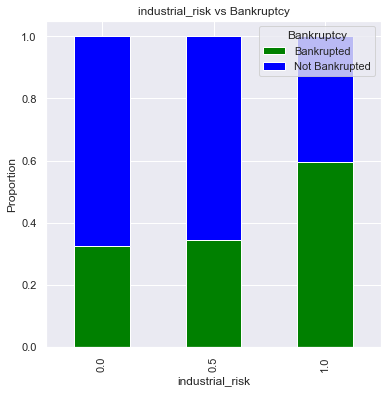

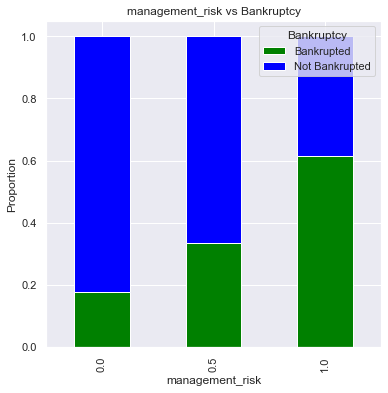

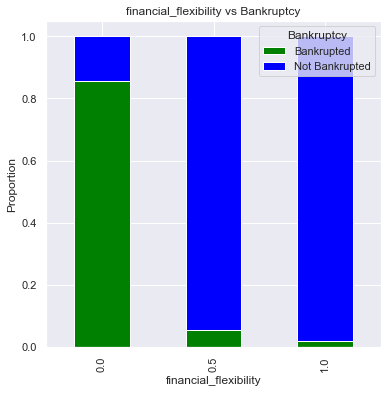

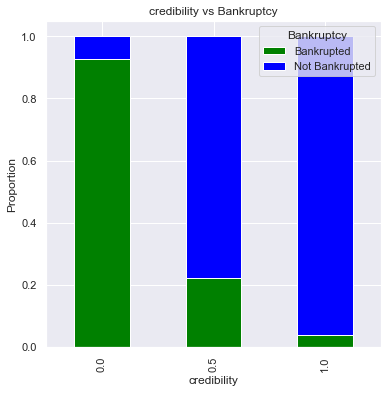

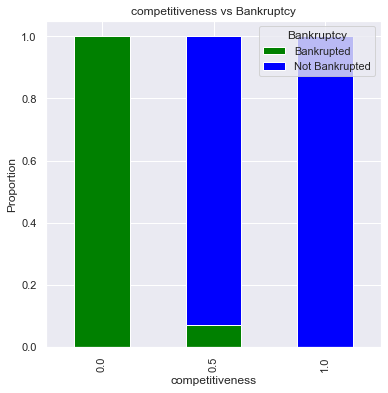

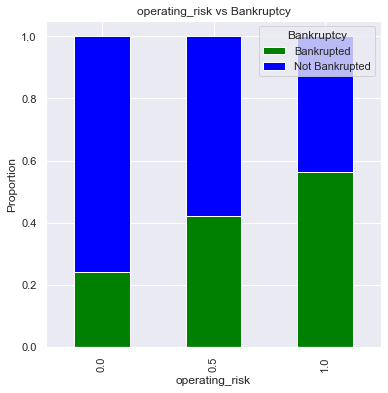

In [40]:
for feature in features:
    counts_df = data1.groupby([feature, "class_value"])["competitiveness"].count().unstack()
    Bankruptcy_df = counts_df.T.div(counts_df.T.sum()).T
    g=Bankruptcy_df.plot(kind="bar", stacked=True, color=["green", "blue"]).set(title="%s vs Bankruptcy"%feature)

    plt.gcf().set_size_inches(6,6)
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    plt.xlabel(feature)
    plt.ylabel("Proportion")

### The above graph shows the comparisions between the bankruptcy classes.<br>We can see the proportion of classes w.r.t the discrete values of the features.
***

> # CONCLUSION FROM EDA PROCESS: <a id="11"></a>

### The data file contains 7 features about 250 companies.
### All independent variables are like ordinal data , so we can't find duplicated & outlier in this dataset and also there is no missing values.

### From the basic pd.crosstab executions, we find that Financial Flexibility, Competitiveness and Credibility does the most contribution for the bankruptcy.

### From the violine plots & stripplots we can see that the density of the plot is increased where lot of data are stacked togethor for each classes of Bankruptcy(0&1).<br>Also Stripplot gives the count of the data accumulated for each class.  Financial Flexibility, Competitiveness and Credibility are showing high correlation from these plots.

### From the Histograms, we can assume that Industrial Risk, Management Risk and Operating Risk have varied businessess(count) with varied Bankruptcy classes. These 3 feature surely impact a little for determining Bankruptcy.

### The Density Estimate plots and distribution plot gives the distribuiton shape which is Multimodal distribution(when u notice 3 modes in a normal distribution curve).

### The grouped Bar charts(1&2) gives us the relation between features and Bankruptcy. We can declare Financial Flexibility, Competitiveness and Credibility are showing higher contribution to Bankruptcy.<br>We can also assume that Industrial Risk, Management Risk and Operating Risk have some impact in determining Bankruptcy. Its still Unclear.

### Stacked Bar charts tells us that in what proportion the data is distributed based on Bankruptcy. 
***

[Get back to EDA Contents](#home)<br>

> ## MODEL BUILDING <a id="model"></a>

# CONTENTS <a id="algorithms"></a>
[1.Logistic Regression](#log)<br>
[2.Naive Bayes Classifier](#Naive)<br>
[3.K Nearest Neighbours](#KNN)<br>
[4.Support Vector Machines](#svm)<br>
[5.Decision Trees](#dt)<br>
[6.Random Forests](#rf)<br>
[7.XG Boost](#xg)<br>
[8.LG Boost](#lg)<br>
[9.Ada Boost](#ada)<br>
[10.Gradient Boosting](#grad)<br>
[11.Artificial Neural Network](#ann)

### Splitting the data into features and target

In [41]:
X=data1.iloc[:,0:6]
Y=data1["class_value"]

### Splitting Data for train and test

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.30)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(175, 6)
(75, 6)
(175,)
(75,)


### Feature Engineering

In [44]:
selector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=20,random_state=0,n_jobs=-1))
selector.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                                 random_state=0))

In [45]:
selector.get_support()

array([False, False,  True, False,  True, False])

In [46]:
features = X_train.columns[selector.get_support()]
features

Index(['financial_flexibility', 'competitiveness'], dtype='object')

### CHI square analysis 

In [47]:
X = data1.iloc[:,[0,1,2,3,4,5]]
Y = data1.iloc[:,[6]]
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
#set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[ 4.22529844  9.40719007 60.23724218 52.30725081 82.1862519   6.4581291 ]


##### what we infer in chi square is there are three feature are getting high score ,mean while it has high valuable information in three feature.

##### We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.
***

# TRYING OUT VARIOUS ALGORITHMS

# 1. Logistic Regression <a id="log"></a>

In [48]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

#### Model Testing

In [49]:
Y_train_pred=log_model.predict(X_train)     #Training data
Y_test_pred=log_model.predict(X_test)       #Testing data

#### Model Evaluation

In [50]:
#Training data
print(confusion_matrix(Y_train,Y_train_pred))
print(classification_report(Y_train,Y_train_pred))       

[[76  0]
 [ 0 99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        99

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [51]:
# Testing data
print(confusion_matrix(Y_test,Y_test_pred))
print(classification_report(Y_test,Y_test_pred))       

[[30  1]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



#### Training Accuracy-100%<br>Testing Accuracy-99%
***

### Using Regularization Techniques 
- Using regularization techniques it is predicting the continuous data.We are not able to evaluate our model since the output data is binary.It cannot handle mixture of continuous and binary data.

In [52]:
# Splitting data # Using Most Important features
x=data1.iloc[:,2:5]
y=data1['class_value']

#### train test split 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

#### Model training and testing 

In [54]:
#Training
log_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
#Testing
y_train_pred=log_model.predict(x_train)
y_test_pred=log_model.predict(x_test)

#### Model evaluation 

In [56]:
#Training data
confusion_matrix(y_train,y_train_pred)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        99

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [57]:
#Testing data
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



##### Even after considering the most important features, there is no change in the accuracy.
***

### Model Building using KFold Cross Validation

#### Model Training, Model Testing, Model Evaluation

In [58]:
cv_score = cross_val_score(estimator = log_model, X=X,y=Y,cv=10)
print('CV score for 5 Fold = {}\nMean Accuracy = {}\nDeviation = {}.'.format(cv_score,cv_score.mean(),cv_score.std()))

CV score for 5 Fold = [1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]
Mean Accuracy = 0.9960000000000001
Deviation = 0.012000000000000009.


#### After using KFold, accuracy is 99.6%

### Insights 

> #### Logistic regression using train test split
    
    After considering all the features we are getting Training Accuracy as 100%,Testing Accuracy as 99%
> #### Logistic regression using KFold validation
    
    After considering all the features we are getting accuracy as 99.6%
[Get back to Model Building Contents](#algorithms)<br>

# 2. Naive Bayes Classifier Algorithm <a id="Naive"></a>

#### Model training 

In [59]:
MB_model=MultinomialNB()
MB_model.fit(X_train,Y_train)

MultinomialNB()

#### Model testing

In [60]:
#Training data
Y_train_pred=MB_model.predict(X_train)

#Testing data
Y_test_pred=MB_model.predict(X_test)

#### Model evaluation

In [61]:
#Training data

confusion_matrix(Y_train,Y_train_pred)
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.96      1.00      0.98        99

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.98       175
weighted avg       0.98      0.98      0.98       175



In [62]:
#Testing data

confusion_matrix(Y_test,Y_test_pred)
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



Training accuracy = 98%

Testing accuracy = 99%

### Model Building using KFold Cross Validation

#### Model training, Model testing and Model evaluation

In [63]:
MB_model=MultinomialNB()
cv_score = cross_val_score(estimator = MB_model, X=X,y=Y,cv=10)
print('CV score for 5 Fold = {}\nMean Accuracy = {}\nDeviation = {}.'.format(cv_score,cv_score.mean(),cv_score.std()))

CV score for 5 Fold = [1.   0.96 1.   0.96 0.92 1.   0.96 1.   1.   0.96]
Mean Accuracy = 0.9760000000000002
Deviation = 0.0265329983228432.


##### Using Kfold,after considering all the features the accuracy is 97.6%

### Insights


>#### Naive Bayes Classifier using Train-Test Split

    After considering all the features we are getting Training Accuracy as 98%,Testing Accuracy as 99%
>#### Naive Bayes Classifier using KFold Cross Validation

    After considering all the features we are getting accuracy as 97.6%
[Get back to Model Building Contents](#algorithms)<br>

# 3. KNN  <a id="KNN"></a>

#### Model training

In [64]:
model1=KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Model testing

In [65]:
#Training data
pred_train=model1.predict(X_train)

#Testing data
pred_test=model1.predict(X_test)

#### Model evaluation 

In [66]:
#Training data

confusion_matrix(Y_train,pred_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        99

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [67]:
#Testing data

confusion_matrix(Y_test,Y_test_pred)
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



#### Choosing a K value

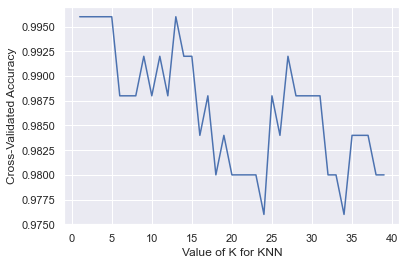

In [68]:
##choosing a k value
k_score=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=5)
    k_score.append(score.mean())
    
plt.plot(range(1,40), k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show() 

##### The range was set for 1 to 40 and every values shows accuracy above 98%. So it doesn't matter which value we choose.

### KFold validation 
#### 5 Fold

In [69]:
kfold = KFold(n_splits=5,random_state=123,shuffle=True)
results =cross_val_score(model1,X_train, Y_train, cv=kfold) 
print(results.mean())

0.9942857142857143


#### 10 Folds

In [70]:
kfold1 = KFold(n_splits=10, random_state=100,shuffle=True)
results1 = cross_val_score(model1, X_train, y_train, cv=kfold1)
print(results1.mean())

0.9944444444444445


##### Also it doesn't matter whether we choose 5 fold or 10 fold since both shows 100% accuracy.

In [71]:
# define folds to test
folds = range(2,31)

# evaluate the model using a given test condition
def evaluate_model(cv):
    # evaluate the model
    scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)#In scoring you can mention different metrics.
    # return scores
    return means(scores) # Here we return the mean score for the Kfolds.

In [72]:
# record mean for each set of results
#means = list()
# evaluate each k value
#for k in folds:
    # define the test condition
  #  cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
  #  k_mean = evaluate_model(cv)
    # report performance
   # print('> folds=%d, accuracy=%.3f' % (k, k_mean))
    # store mean accuracy
  #  means.append(k_mean)

### Insights 

>#### KNN using Train-Test Split

    After considering all the features we are getting Training Accuracy as 100%,Testing Accuracy as 99%
>#### KNN using KFold Cross Validation

    Both 10 fold and 5 fold are giving out 100% accuracy.
[Get back to Model Building Contents](#algorithms)<br>

# 4. SVM <a id="svm"></a>
Dataset is read into data1 and attributes are renamed. Now we proceed with Support Vector Machine.

### Sampling

In [73]:
resamp = data1.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) 

Counter({1: 143, 0: 107})
Counter({0: 143, 1: 143})


### t-sne visualization

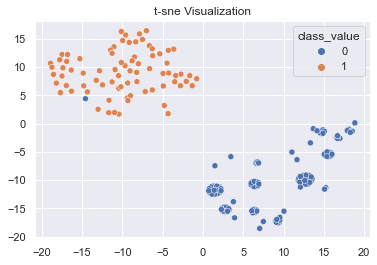

In [74]:
data_tsne_pca = TSNE(n_components=2).fit_transform(a)
sns.scatterplot(data_tsne_pca[:,0],data_tsne_pca[:,1],hue=b, palette="deep").set_title('t-sne Visualization')
plt.show()

##### Visualization shows that there is not much overlapping between data points

### train test split

In [75]:
X1 = a
Y1 = b
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.3)

### SVM model

In [76]:
model = SVC(kernel='linear', C=1000)
model.fit(X1_train, Y1_train)

SVC(C=1000, kernel='linear')

### Model evaluation

In [77]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(confusion_matrix(y_test,model_preds))
    print(classification_report(y_test,model_preds))
    plot_confusion_matrix(model,X_test,y_test)

[[30  1]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



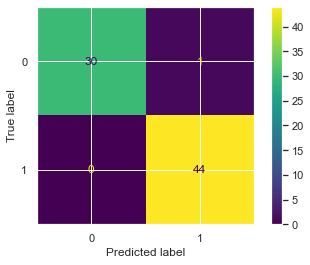

In [78]:
report_model(model)

##### Accuracy of the model is found to be 99%
##### Tried experimenting with the hyperparameter by reducing C values and there is no major change in accuracy of the model.

### Trying GridSearch CV

In [79]:
grid_model = SVC()
param_grid = [{'kernel':['rbf','linear','poly','sigmoid'], 'gamma':[50,5,10,0.5],'C':[1000,600,200,100,15,10,0.01,0.001]}]
gsv = GridSearchCV(grid_model,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 600, 200, 100, 15, 10, 0.01, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}])

In [80]:
gsv.best_params_, gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'linear'}, 1.0)

### Final Model on SVM

[[30  1]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



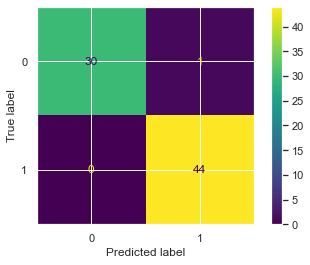

In [81]:
final_model = SVC(kernel='rbf',C=1000)
final_model.fit(X_train,y_train)
report_model(final_model)
plt.show()

##### Kernel is changed to 'rbf' according to the ressults from GridSearch and there is no visible change whatsoever in the final model. 

### Insights

>#### SVM with GridSearch CV
    
    The final model have an accuracy of 99%.
    Tried out different values for C and tried changing kernel. Doesn't affect accuracy much.
[Get back to Model Building Contents](#algorithms)<br>

# 5. Decision Tree <a id="dt"></a>

In [82]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
model.fit(X_train,Y_train)
ac(Y_test,model.predict(X_test))

0.9866666666666667

In [83]:
X= []
for i in range(0,250):
    X.append(list(data1.iloc[i,:-1]))
Y= list(data1.iloc[:,-1])

[Text(248.0, 528.5, 'competitiveness <= 0.25\ngini = 0.491\nsamples = 175\nvalue = [76, 99]\nclass = non-bankruptcy'),
 Text(124.0, 377.5, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]\nclass = bankruptcy'),
 Text(372.0, 377.5, 'credibility <= 0.25\ngini = 0.075\nsamples = 103\nvalue = [4, 99]\nclass = non-bankruptcy'),
 Text(248.0, 226.5, 'financial_flexibility <= 0.25\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = bankruptcy'),
 Text(124.0, 75.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = bankruptcy'),
 Text(372.0, 75.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = non-bankruptcy'),
 Text(496.0, 226.5, 'gini = 0.0\nsamples = 95\nvalue = [0, 95]\nclass = non-bankruptcy')]

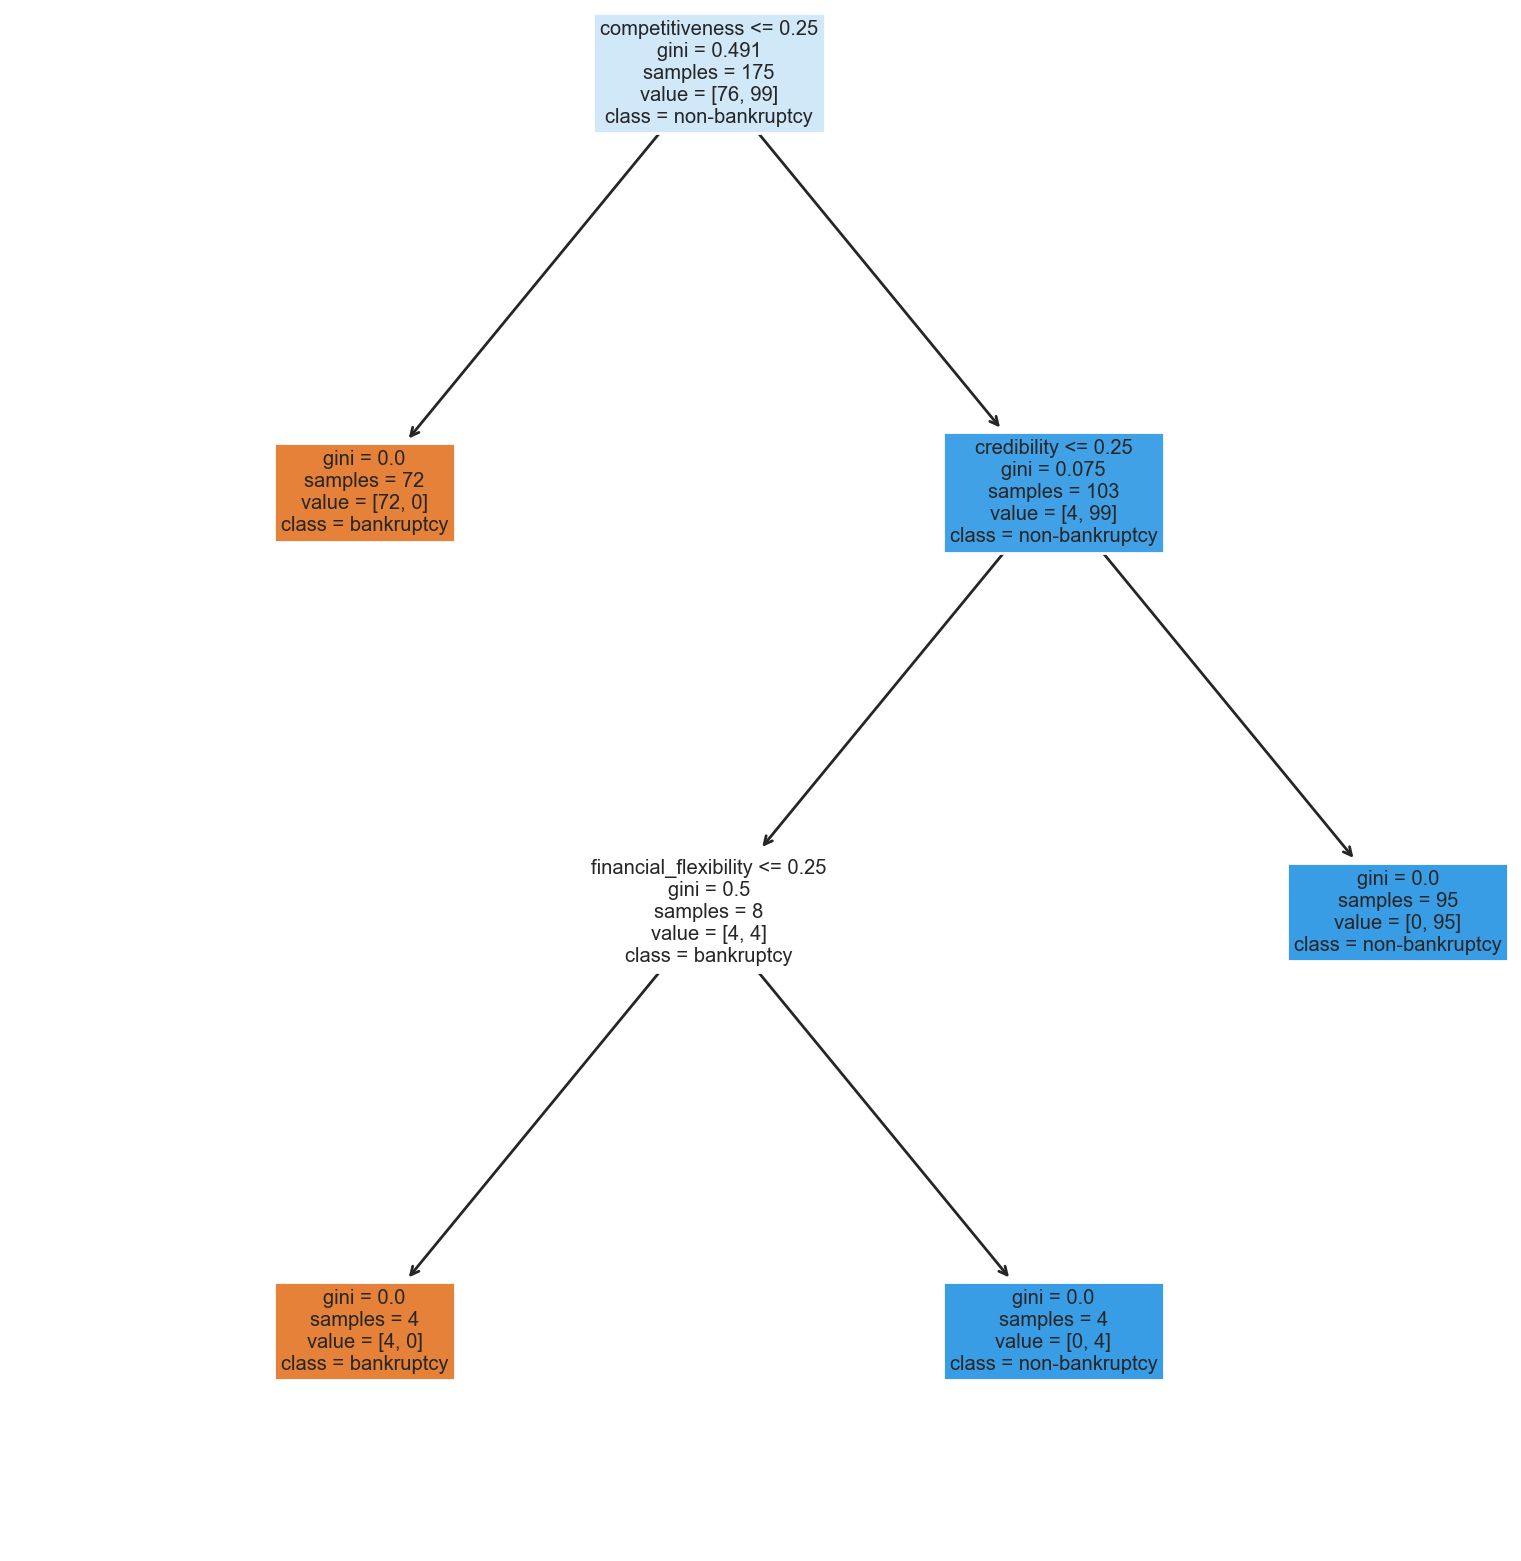

In [84]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(model,feature_names=data1.columns,class_names=['bankruptcy','non-bankruptcy'],filled=True)

### Using Stratified KFold mechanism

In [85]:
kf = StratifiedKFold(n_splits=10)
for train,test in kf.split(X,Y):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for index in train:
        x_train.append(X[index])
        y_train.append(Y[index])
    x_train=pd.DataFrame(x_train)
    for index in test:
        x_test.append(X[index])
        y_test.append(Y[index])
    x_test=pd.DataFrame(x_test)
    model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
    model.fit(x_train,y_train)
    print("train indices: \n",train)
    print("test indices: \n",test)
    print("With gini criterion: ",ac(y_test,model.predict(x_test)))
    model = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2)
    model.fit(x_train,y_train)
    print("With entropy criterion: ",ac(y_test,model.predict(x_test)))
    print("*"*80)
    

train indices: 
 [ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249]
test indices: 
 [  0   1   2   3   4   5   6   7   8   9  10 107 108 

In [86]:
kf = KFold(n_splits=10)
model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
cross_val_score(model,X,Y,cv=kf).mean()

0.992

###    Insights

>#### Decision Tree classifier

    Accuracy is found to be 98%
>#### Stratified KFold

    Using KFolds seems to be giving out 99.2% accuracy.
[Get back to Model Building Contents](#algorithms)<br>

# 6. Random Forest <a id="rf"></a>

In [87]:
model=RandomForestClassifier(n_estimators=4,max_depth=2,max_features=4)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [88]:
ac(Y_test,y_pred)

1.0

### Tree diagram of base estimator

[Text(248.0, 528.5, 'competitiveness <= 0.25\ngini = 0.491\nsamples = 175\nvalue = [76, 99]\nclass = non-bankruptcy'),
 Text(124.0, 377.5, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]\nclass = bankruptcy'),
 Text(372.0, 377.5, 'credibility <= 0.25\ngini = 0.075\nsamples = 103\nvalue = [4, 99]\nclass = non-bankruptcy'),
 Text(248.0, 226.5, 'financial_flexibility <= 0.25\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = bankruptcy'),
 Text(124.0, 75.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = bankruptcy'),
 Text(372.0, 75.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = non-bankruptcy'),
 Text(496.0, 226.5, 'gini = 0.0\nsamples = 95\nvalue = [0, 95]\nclass = non-bankruptcy')]

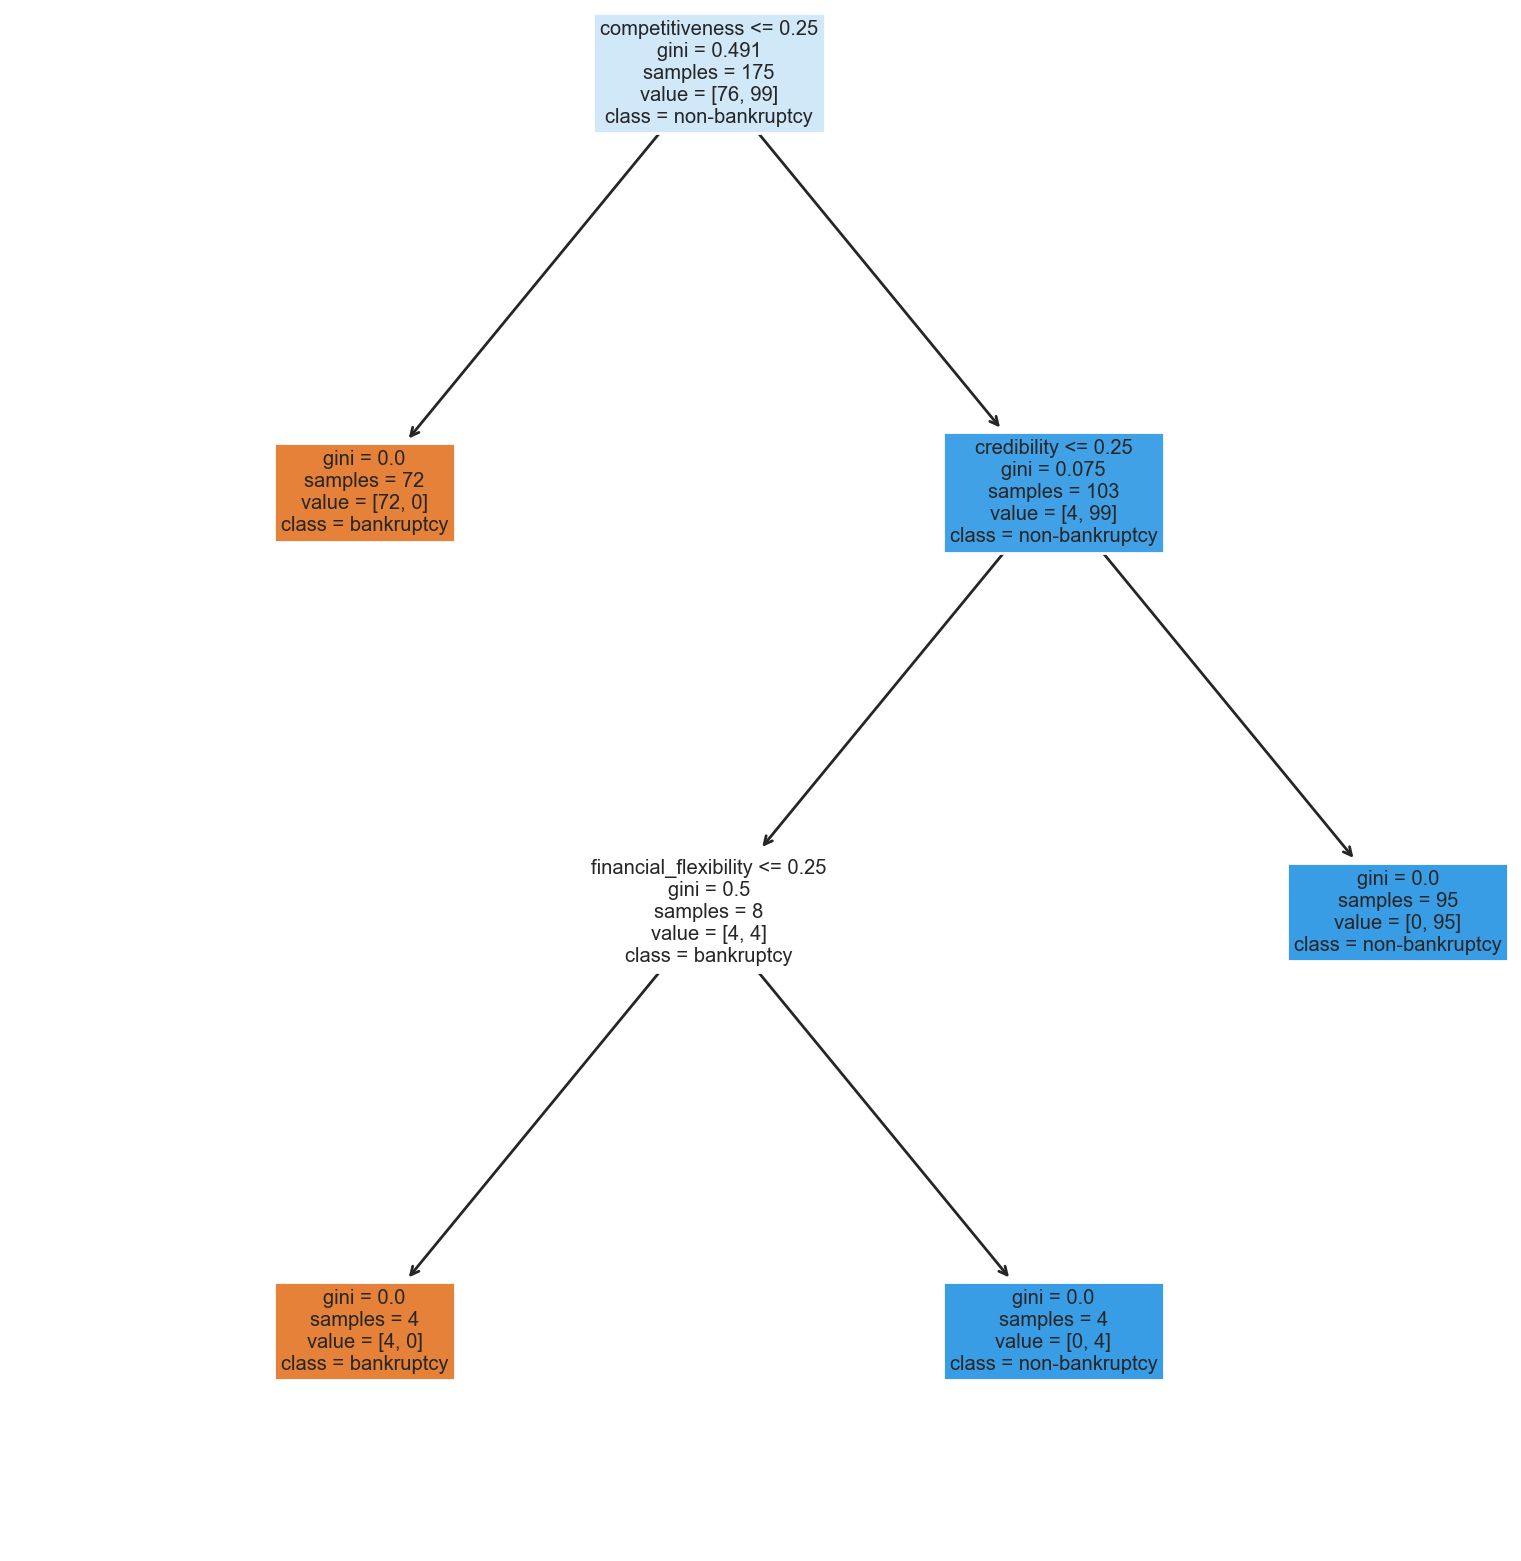

In [89]:
model.base_estimator_.fit(X_train,Y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(model.base_estimator_,feature_names=data1.columns,class_names=['bankruptcy','non-bankruptcy'],filled=True)

### Insights

>#### Train test split

    Using train test split on random forest, we get 100% accuracy.
[Get back to Model Building Contents](#algorithms)<br>

# 7. XGBoost <a id="xg"></a>

### Model training 

In [90]:
model = XGBClassifier()
model.fit(X_train, Y_train)

[19:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model testing

In [91]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

### Model evaluation

In [92]:
accuracy = ac(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.67%


### Insights

>#### XGBoost

    Using XGBoost, we get 98.67% accuracy.
[Get back to Model Building Contents](#algorithms)<br>

# 8. LGBoost <a id="lg"></a>

In [93]:
d_train = lgb.Dataset(X_train, label=Y_train)

In [94]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [95]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 99, number of negative: 76
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 175, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565714 -> initscore=0.264387
[LightGBM] [Info] Start training from score 0.264387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [96]:
y_pred=clf.predict(X_test)

In [97]:
predictions = [round(value) for value in y_pred]

In [98]:
ac(Y_test, predictions)

0.9866666666666667

### Insights

>#### LGBoost

    With LGBoost, we get an accuracy of 98.6%.

# 9. ADABoost <a id="ada"></a>

In [99]:
num_trees = 10
seed=42
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


### Insights

>#### ADABoost

    We used adaboost algorithm & for splitting data we used Kfold.
    Number of tree used is 10.
    With the use of adaboost algorithm we get 99.6% accuracy.
[Get back to Model Building Contents](#algorithms)<br>

# 10. Gradient Boosting <a id="grad"></a>

### Model training 

In [100]:
model1=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=42,max_depth=5 )
model1.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500,
                           random_state=42)

### Model evaluation

In [101]:
#Testing data

print("model1 accuracy is %2.2f" % ac( 
     Y_test, model1.predict(X_test)))

model1 accuracy is 0.99


In [102]:
#Training data

print("model1 accuracy is %2.2f" % ac( 
     Y_train, model1.predict(X_train)))

model1 accuracy is 1.00


### Insights 

>#### Gradient Boosting
    
    We used gradient boosting & for splitting the data we used train test split.
    With the use of gradient boosting we get 99% testing data accuracy and 100% training data accuracy.
[Get back to Model Building Contents](#algorithms)<br>


# 11. Artificial Neural Network <a id="ann"></a>
Hyperparameters in ANN - Used to Fine tune a model for high accuracy
   
   1. How many number of hidden layers we should have? - We used 2 to 20 layers.
   2. How many number of neurons we should have in hidden layers? - We used 32 to 512 neurons.
   3. Learning Rate - We used 1e-2, 1e-3, 1e-4.
      
      Other Parameters used
   4. Loss function - Binary Cross Entropy
   5. Metric - Accuracy
   6. Activation function - Sigmoid for the Output layer and Relu for all other layers
   7. Optimizer - Adam

In [103]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [104]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=6,))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [122]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project5',
    project_name='Bankruptcy Prevention')

##### We are tuning the model based on Validation accuracy. 

In [123]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


### fitting the data by comparing with the validation set made.


In [124]:
tuner.search(X_train_scaled, Y_train,
             epochs=50,
             validation_split=0.3)

Trial 5 Complete [00h 00m 09s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 10s
INFO:tensorflow:Oracle triggered exit


In [108]:
tuner.results_summary()

Results summary
Results in project3\Bankruptcy Prevention
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 128
units_1: 448
learning_rate: 0.001
units_2: 64
units_3: 416
units_4: 512
units_5: 32
units_6: 32
units_7: 32
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 10
units_0: 160
units_1: 224
learning_rate: 0.0001
units_2: 224
units_3: 128
units_4: 384
units_5: 352
units_6: 320
units_7: 352
units_8: 32
units_9: 32
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 5
units_0: 288
units_1: 320
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 3
units_0: 320
units_1: 64
learning_rate: 0.01
units_2: 416
units_3: 32
units_4: 416
units_5: 96
units_6: 64
units_7: 512
units_8: 256
units_9: 512
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 6
units_0: 480
units_1: 96
learning_rate: 0.001
units_2: 192
units_3: 224
units_4: 416
units_5: 32
Sco

##### Here By Keras tuner Optimization, We have few best combinations of Hyperparameters leading to high Accuracy(100 percent in this case). Now we choose the best combination to make a final Neural Network for Model building.¶


### Making the Final Model with the chosen hyperparameters

In [109]:
classifier=Sequential()

In [110]:
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu',input_dim=6))
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=384,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=1,kernel_initializer ='glorot_uniform',activation='sigmoid'))

In [111]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 224)               1568      
_________________________________________________________________
dense_4 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_5 (Dense)              (None, 384)               86400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 385       
Total params: 138,753
Trainable params: 138,753
Non-trainable params: 0
_________________________________________________________________


In [112]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [125]:
model_final=classifier.fit(X_train_scaled, Y_train,
             epochs=100,batch_size=10,
             validation_split=0.3)

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 1.4079e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3684e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3318e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.2957e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.2554e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 1.2192e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 1.1906e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_ac

KeyboardInterrupt: 

##### - For 100 epochs, We can notice that there is high training accuracy(100%) and validation accuracy of 100%
- From this we can tell that our model is performing very well.
- Here we can notice that the validation split is a split from the X_train data. So, For predicting we use the test data(Unseen data) which is not affected by any data leakage thus preventing overfitting.¶ 

### Prediction and Confusion Matrix and AUC ROC Curve

In [114]:
pred_y=classifier.predict(X_test)

In [115]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC Score :  0.995601173020528
Function for ROC_AUC Score :  0.995601173020528
Threshold value is: 0.994313


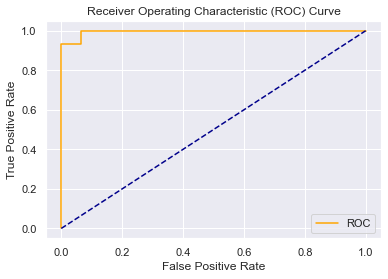

In [116]:
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(Y_test, pred_y)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(Y_test, pred_y))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### This is a very good ROC Curve meaning that we can perfectly distinguish between Bankrupted and Not Bankrupted.

In [117]:
y_pred = (pred_y >= 0.98791194) #optimal threshold is 0.0.98791194
y_pred=1*y_pred 

In [118]:
cm = confusion_matrix(Y_test, y_pred)
score=ac(y_pred,Y_test)

In [119]:
print("Confusion Matrix: \n",cm,"\n Test Accuracy Score: ", score,"\n\n")
print(classification_report(Y_test,y_pred))

Confusion Matrix: 
 [[29  2]
 [ 0 44]] 
 Test Accuracy Score:  0.9733333333333334 


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.96      1.00      0.98        44

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



##### From the confusion matrix and report, We can see that 2 of the data is misclassified. But Still we can say that our model is performing very good on Unseen data.

### Graphical representation of Accuracy and loss w.r.t no. of Epochs.

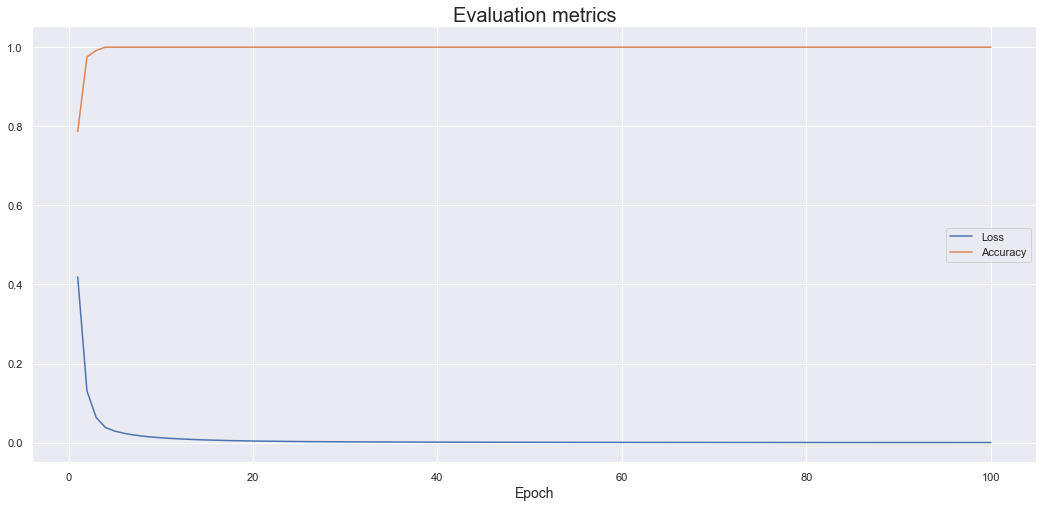

In [120]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    model_final.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    model_final.history['accuracy'], label='Accuracy'
)

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

##### From Graph, we can see the increase in accuracy and decrease in loss w.r.t epochs. 

### Insights

>#### Artificial Neural Network

    Since all the graphs and results shows high accuracy, thus we can conclude that our ANN model is performing perfectly with very high accuracy.

[Get back to Model Building Contents](#algorithms)<br>
[Go Home](#home)<br>